# Testing out data functions

In [99]:
import os
import netCDF4 as nc
from adforce.constants import DATA_PATH

In [100]:
ds_groups = nc.Dataset(os.path.join(DATA_PATH, "blank.nc"))
ds_groups

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    group_order: Main TC1
    institution: Oceanweather Inc. (OWI)
    conventions: CF-1.6 OWI-NWS13
    dimensions(sizes): 
    variables(dimensions): 
    groups: Main, TC1

In [101]:
ds_old = nc.Dataset(os.path.join(DATA_PATH, "blank.nc"))["Main"]
ds_old 

<class 'netCDF4._netCDF4.Group'>
group /Main:
    rank: 1
    dimensions(sizes): time(673), yi(385), xi(393)
    variables(dimensions): float64 lat(yi, xi), float64 lon(yi, xi), int32 time(time), float32 PSFC(time, yi, xi), float32 U10(time, yi, xi), float32 V10(time, yi, xi)
    groups: 

In [102]:
ds_tc = ds_old = nc.Dataset(os.path.join(DATA_PATH, "blank.nc"))["TC1"]
ds_tc

<class 'netCDF4._netCDF4.Group'>
group /TC1:
    rank: 2
    dimensions(sizes): time(481), yi(161), xi(161)
    variables(dimensions): float64 lat(time, yi, xi), float64 clat(time), float64 lon(time, yi, xi), float64 clon(time), int32 time(time), float32 PSFC(time, yi, xi), float32 U10(time, yi, xi), float32 V10(time, yi, xi)
    groups: 

In [103]:
ds_old["PSFC"]

<class 'netCDF4._netCDF4.Variable'>
float32 PSFC(time, yi, xi)
    _FillValue: 9.96921e+36
    units: mb
    coordinates: time lat lon
path = /TC1
unlimited dimensions: time
current shape = (481, 161, 161)
filling on

In [104]:
ds_old["U10"]

<class 'netCDF4._netCDF4.Variable'>
float32 U10(time, yi, xi)
    units: m s-1
    _FillValue: 9.96921e+36
    coordinates: time lat lon
path = /TC1
unlimited dimensions: time
current shape = (481, 161, 161)
filling on

In [105]:
lats = nc.Dataset(os.path.join(DATA_PATH, "blank.nc"))["Main"]["lat"]
lats

<class 'netCDF4._netCDF4.Variable'>
float64 lat(yi, xi)
    axis: Y
    _FillValue: 9.969209968386869e+36
    units: degrees_north
    standard_name: latitude
    coordinates: lat lon
path = /Main
unlimited dimensions: 
current shape = (385, 393)
filling on

In [106]:
import numpy as np
lat_2d = lats[:][:, 0]
lat_2d[0], lat_2d[-1], - lat_2d[0] + lat_2d[1], np.allclose( - lat_2d[0:-1] + lat_2d[1:], 0.125)

(0.0, 48.0, 0.125, True)

In [107]:
lons = nc.Dataset(os.path.join(DATA_PATH, "blank.nc"))["Main"]["lon"]
lons

<class 'netCDF4._netCDF4.Variable'>
float64 lon(yi, xi)
    axis: X
    _FillValue: 9.969209968386869e+36
    units: degrees_east
    standard_name: longitude
    coordinates: lat lon
path = /Main
unlimited dimensions: 
current shape = (385, 393)
filling on

In [108]:
lons_2d = lons[:][0, :]
lons_2d[0], lons_2d[-1], lons_2d[0] - lons_2d[1], np.allclose(
    lons_2d[0:-1] - lons_2d[1:], -0.125
)

(-99.0, -50.0, -0.125, True)

In [109]:
times = nc.Dataset(os.path.join(DATA_PATH, "blank.nc"))["Main"]["time"]
times

<class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    _FillValue: -2147483647
    axis: T
    units: minutes since 1990-01-01T01:00:00+00:00
    coordinates: time
    calendar: proleptic_gregorian
path = /Main
unlimited dimensions: time
current shape = (673,)
filling on

In [110]:
times[:][0], times[:][-1], times[:][0] - times[:][1], np.allclose(
    times[:][:-1] - times[:][1:], times[:][0] - times[:][1]
)

(7680900, 7690980, -15, True)

In [111]:
lats = nc.Dataset(os.path.join(DATA_PATH, "blank.nc"))["TC1"]["lat"]
lats

<class 'netCDF4._netCDF4.Variable'>
float64 lat(time, yi, xi)
    _FillValue: 9.969209968386869e+36
    units: degrees_north
    standard_name: latitude
    axis: Y
    coordinates: time lat lon
path = /TC1
unlimited dimensions: time
current shape = (481, 161, 161)
filling on

In [112]:
lat_2d = lats[:][0, :, 0]
lat_2d[0], lat_2d[-1], -lat_2d[0] + lat_2d[1], np.allclose(
    -lat_2d[0:-1] + lat_2d[1:], 0.012500, atol=1e-4
)

(20.493749618530273, 22.493749618530273, 0.012500762939453125, True)

In [113]:
lons = nc.Dataset(os.path.join(DATA_PATH, "blank.nc"))["TC1"]["lon"]
lons

<class 'netCDF4._netCDF4.Variable'>
float64 lon(time, yi, xi)
    _FillValue: 9.969209968386869e+36
    units: degrees_east
    standard_name: longitude
    axis: X
    coordinates: time lat lon
path = /TC1
unlimited dimensions: time
current shape = (481, 161, 161)
filling on

In [114]:
times = nc.Dataset(os.path.join(DATA_PATH, "blank.nc"))["TC1"]["time"]
times

<class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    _FillValue: -2147483647
    axis: T
    units: minutes since 1990-01-01T01:00:00+00:00
    coordinates: time
    calendar: proleptic_gregorian
path = /TC1
unlimited dimensions: time
current shape = (481,)
filling on

In [115]:
times[:][0], times[:][-1], times[:][0] - times[:][1], np.allclose(
    times[:][:-1] - times[:][1:], times[:][0] - times[:][1]
)

(7680900, 7688100, -15, True)

In [116]:
lons_2d = lons[:][0, 0, :]
lons_2d[0], lons_2d[-1], lons_2d[0] - lons_2d[1], np.allclose(
    lons_2d[0:-1] - lons_2d[1:], -0.0125, atol=1e-4
)

(-86.5062484741211, -84.5062484741211, -0.0124969482421875, True)

In [117]:
import yaml

coord_yaml ="""
Main:
    type: rectilinear_square
    bottom_left_corner: 
        - -99.0
        - 0.0
    lateral_spacing: 0.125
    xlen: 393
    ylen: 385
    tlen: 673
    start: 7680900
    timestep: 15
    time_unit: minutes since 1990-01-01T01:00:00+00:00
    time_calendar: proleptic_gregorian
TC1: 
    type: moving_rectilinear_square
    lateral_spacing: 0.0125
    xlen: 161
    ylen: 161
    tlen: 481
    start: 7680900
    timestep: 15
    time_unit: minutes since 1990-01-01T01:00:00+00:00
    time_calendar: proleptic_gregorian
"""

coord_config = yaml.safe_load(coord_yaml)
coord_config

{'Main': {'type': 'rectilinear_square',
  'bottom_left_corner': [-99.0, 0.0],
  'lateral_spacing': 0.125,
  'xlen': 393,
  'ylen': 385,
  'tlen': 673,
  'start': 7680900,
  'timestep': 15,
  'time_unit': 'minutes since 1990-01-01T01:00:00+00:00',
  'time_calendar': 'proleptic_gregorian'},
 'TC1': {'type': 'moving_rectilinear_square',
  'lateral_spacing': 0.0125,
  'xlen': 161,
  'ylen': 161,
  'tlen': 481,
  'start': 7680900,
  'timestep': 15,
  'time_unit': 'minutes since 1990-01-01T01:00:00+00:00',
  'time_calendar': 'proleptic_gregorian'}}

In [118]:
def rectilinear_square(config: dict, trial: int = 14) -> nc.Dataset:
    """
    Create a rectilinear grid with square cells based on config.

    Args:
        config (dict): A dictionary containing the information necesary to reconstruct the coordinates.
    """
    lons = np.linspace(config["bottom_left_corner"][0], config["bottom_left_corner"][0] + config["lateral_spacing"] * (config["xlen"]-1), config["xlen"],  dtype=np.float64)
    lats = np.linspace(config["bottom_left_corner"][1], config["bottom_left_corner"][1] + config["lateral_spacing"] * (config["ylen"]-1), config["ylen"],  dtype=np.float64)

    lons, lats = np.meshgrid(lons, lats)
    # currently assumes time is in minutes from 1990-01-01 00:00:00
    # should be able to change this so that it can also accept date time strings.
    times = np.linspace(config["start"], config["start"] + (config["tlen"]-1) * (config["timestep"]), config["tlen"], dtype=np.int32)
    # create netcdf coordinate dataset
    ds = nc.Dataset(f"trial{trial}.nc", 'w', format='NETCDF4')
    # time is an unlimited dimension
    ds.createDimension('time', None)
    ds.createDimension('yi', config["ylen"])
    ds.createDimension('xi', config["xlen"])
    ds.createVariable('time', 'i4', ('time',), fill_value=-2147483647)
    ds.createVariable('lat', 'f8', ('yi', 'xi'), fill_value=9.969209968386869e+36)
    ds.createVariable('lon', 'f8', ('yi', 'xi'), fill_value=9.969209968386869e+36)
    # add data to netcdf dataset
    ds['time'][:] = times
    ds['lat'][:] = lats
    ds['lon'][:] = lons
    ds['time'].units = config["time_unit"]
    ds['time'].calendar = config["time_calendar"]
    # set standard coordinate attributes
    ds['lat'].units = 'degrees_north'
    ds['lon'].units = 'degrees_east'
    ds['lat'].axis = 'Y'
    ds['lon'].axis = 'X'
    ds['time'].axis = 'T'
    ds['time'].coordinates = 'time'
    ds['lat'].coordinates = 'lat lon'
    ds['lon'].coordinates = 'lat lon'
    ds['lat'].standard_name = 'latitude'
    ds['lon'].standard_name = 'longitude'
    ds['time'].standard_name = 'time'
    # add attribute rank=1 to dataset
    ds.rank = 1
    return ds


def add_blank_psfc_u10(ds: nc.Dataset, background_pressure: float = 1010) -> nc.Dataset:
    """Add blank pressure and velocity fields to an existing netcdf dataset.
    
    Args:
        ds (nc.Dataset): reference to input netcdf4 dataset.
        background_pressure: background pressure to assume in mb. Defaults to 1010 mb.
        
    Returns:
        ds (nc.Dataset): reference to transformed netcdf4 dataset.
    """
    ds.createVariable("PSFC", "f4", ("time", "yi", "xi"),fill_value=9.96921e+36)
    ds.createVariable("U10", "f4", ("time", "yi", "xi"), fill_value=9.96921e36)
    ds.createVariable("V10", "f4", ("time", "yi", "xi"), fill_value=9.96921e+36)
    shape = (len(ds.dimensions["time"]), len(ds.dimensions["yi"]), len(ds.dimensions["xi"]))
    ds["U10"][:] = np.zeros(shape, dtype="float32")
    ds["V10"][:] = np.zeros(shape, dtype="float32")
    ds["PSFC"][:] = np.zeros(shape, dtype="float32") + background_pressure
    ds["PSFC"].units = "mb"
    ds["U10"].units = "m s-1"
    ds["V10"].units = "m s-1"
    ds["PSFC"].coordinates = "time lat lon"
    ds["U10"].coordinates = "time lat lon"
    ds["V10"].coordinates = "time lat lon"
    ds["PSFC"].standard_name = "Surface pressure"
    ds["U10"].standard_name = "10m zonal windspeed"
    ds["V10"].standard_name = "10m meridional windspeed"
    return ds

In [119]:
# open original full netcdf 


In [120]:
ds_tc

<class 'netCDF4._netCDF4.Group'>
group /TC1:
    rank: 2
    dimensions(sizes): time(481), yi(161), xi(161)
    variables(dimensions): float64 lat(time, yi, xi), float64 clat(time), float64 lon(time, yi, xi), float64 clon(time), int32 time(time), float32 PSFC(time, yi, xi), float32 U10(time, yi, xi), float32 V10(time, yi, xi)
    groups: 

In [121]:
from adforce.time import unknown_to_time


def moving_rectilinear_square(config: dict, tc_config: dict, nc_file=f"trajectory.nc") -> nc.Dataset:
    """
    Create a rectilinear grid with square cells based on config.
    The grid moves based on the translation speed and angle of the tropical cyclone.

    Args:
        config (dict): A dictionary containing the information necesary to reconstruct the coordinates.
        tc_config (dict): A dictionary containing the information necesary to reconstruct the tropical cyclone trajectory.

    Returns:
        ds (nc.Dataset): reference to transformed netcdf4 dataset.
    """
    # create a rectilinear grid with square cells based on config.
    lons = np.linspace(0, 0 + config["lateral_spacing"] * (config["xlen"]-1), config["xlen"],  dtype=np.float64)
    lons = lons - lons.mean()
    lats = np.linspace(0, 0 + config["lateral_spacing"] * (config["ylen"]-1), config["ylen"],  dtype=np.float64)
    lats = lats - lats.mean()
    lons, lats = np.meshgrid(lons, lats)

    tlen = config["tlen"]
    start = unknown_to_time(config["start"], config["time_unit"], config["time_calendar"])

    times = np.linspace(start, start + (tlen-1) * (config["timestep"]), tlen, dtype=np.int32) # time in minutes from start of calendar

    angle = tc_config["angle"]["value"]
    speed = tc_config["translation_speed"]["value"]
    ilon = tc_config["impact_location"]["value"][0]
    ilat = tc_config["impact_location"]["value"][1]
    itime = unknown_to_time(tc_config["impact_time"]["value"], config["time_unit"], config["time_calendar"])

    angular_distances = (times - itime) / 60 * speed / 111e3
    point = np.array([[ilon], [ilat]])
    slope = np.array([[np.sin(np.radians(angle))], [np.cos(np.radians(angle))]])
    clon_clat_array = (point + slope * angular_distances)
    lons = lons + clon_clat_array[0, :].reshape(tlen, 1, 1)
    lats = lats + clon_clat_array[1, :].reshape(tlen, 1, 1)

    ds = nc.Dataset(nc_file, 'w', format='NETCDF4')
    # time is an unlimited dimension
    ds.createDimension('time', None)
    ds.createDimension('yi', config["ylen"])
    ds.createDimension('xi', config["xlen"])
    ds.createVariable('time', 'i4', ('time',), fill_value=-2147483647)
    ds.createVariable('clat', 'f8', ('time',), fill_value=9.969209968386869e+36)
    ds.createVariable('clon', 'f8', ('time',), fill_value=9.969209968386869e+36)
    ds.createVariable('lat', 'f8', ('time', 'yi', 'xi'), fill_value=9.969209968386869e+36)
    ds.createVariable('lon', 'f8', ('time', 'yi', 'xi'), fill_value=9.969209968386869e+36)
    # add data to netcdf dataset
    ds['time'][:] = times
    ds['lat'][:] = lats
    ds['lon'][:] = lons
    ds['clon'][:] = clon_clat_array[0]
    ds['clat'][:] = clon_clat_array[1]
    ds['time'].units = config["time_unit"]
    ds['time'].calendar = config["time_calendar"]
    # set standard coordinate attributes
    ds['lat'].units = 'degrees_north'
    ds['lon'].units = 'degrees_east'
    ds['clat'].units = 'degrees_north'
    ds['clon'].units = 'degrees_east'
    ds['clat'].coordinates = 'time'
    ds['clon'].coordinates = 'time'
    ds['lat'].axis = 'Y'
    ds['lon'].axis = 'X'
    ds['time'].axis = 'T'
    ds['time'].coordinates = 'time'
    ds['lat'].coordinates = 'time lat lon'
    ds['lon'].coordinates = 'time lat lon'
    ds['lat'].standard_name = 'latitude'
    ds['lon'].standard_name = 'longitude'
    ds['time'].standard_name = 'time'
    ds['clat'].long_name = 'center latitude of feature'
    ds['clon'].long_name = 'center longitude of feature'
    # add attribute rank=2 to dataset
    ds.rank = 2
    return add_blank_psfc_u10(ds)

In [122]:
def create_fort22(grid_config: dict, tc_config: dict):
    # Create a new netCDF4 file
    ds = nc.Dataset('example.nc', 'w', format='NETCDF4')
    # Create the "Main" group (rank 1)
    main_group = ds.createGroup('Main')
    # Create the "TC1" group within the "Main" group (rank 2)
    tc1_group = main_group.createGroup('TC1')

In [123]:
np.array([[0], [0]]).shape

(2, 1)

In [124]:
import os
import yaml
from adforce.constants import CONFIG_PATH

tc_config = yaml.safe_load(open(os.path.join(CONFIG_PATH, "tc",  "tc_param_config.yaml")))
config = yaml.safe_load(open(os.path.join(CONFIG_PATH, "grid", "grid_fort22_config.yaml")))

In [125]:
tc_config["angle"]["value"] = 45

In [127]:
traj_ds = moving_rectilinear_square(config["TC1"], tc_config, nc_file="traj45.2.nc")
traj_ds

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    rank: 2
    dimensions(sizes): time(481), yi(161), xi(161)
    variables(dimensions): int32 time(time), float64 clat(time), float64 clon(time), float64 lat(time, yi, xi), float64 lon(time, yi, xi), float32 PSFC(time, yi, xi), float32 U10(time, yi, xi), float32 V10(time, yi, xi)
    groups: 

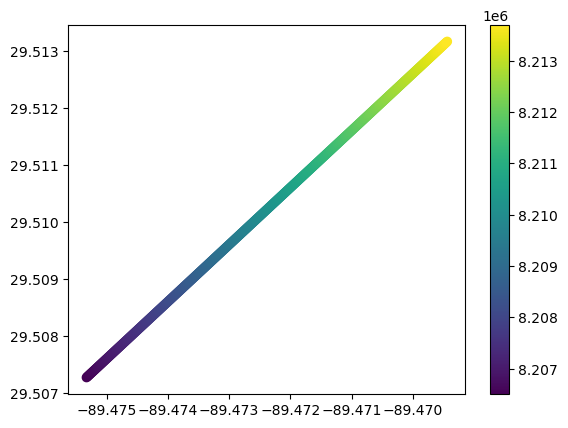

In [128]:
import matplotlib.pyplot as plt
plt.scatter(traj_ds["clon"][:], traj_ds["clat"][:], c=traj_ds["time"][:])
plt.colorbar()
# set aspect ratio to be equal


In [129]:
traj_ds["V10"]

<class 'netCDF4._netCDF4.Variable'>
float32 V10(time, yi, xi)
    _FillValue: 9.96921e+36
    units: m s-1
    coordinates: time lat lon
    standard_name: 10m meridional windspeed
unlimited dimensions: time
current shape = (481, 161, 161)
filling on

In [130]:
np.zeros((2, 1 )) + np.zeros((2, 481))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [131]:
config

{'Main': {'type': 'rectilinear_square',
  'bottom_left_corner': [-99.0, 0.0],
  'lateral_spacing': 0.125,
  'xlen': 393,
  'ylen': 385,
  'tlen': 673,
  'start': datetime.datetime(2005, 8, 9, 0, 0),
  'timestep': 15,
  'time_unit': 'minutes since 1990-01-01T01:00:00+00:00',
  'time_calendar': 'proleptic_gregorian'},
 'TC1': {'type': 'moving_rectilinear_square',
  'lateral_spacing': 0.0125,
  'xlen': 161,
  'ylen': 161,
  'tlen': 481,
  'start': datetime.datetime(2005, 8, 9, 0, 0),
  'timestep': 15,
  'time_unit': 'minutes since 1990-01-01T01:00:00+00:00',
  'time_calendar': 'proleptic_gregorian'}}

In [132]:
ds_tc["PSFC"]

<class 'netCDF4._netCDF4.Variable'>
float32 PSFC(time, yi, xi)
    _FillValue: 9.96921e+36
    units: mb
    coordinates: time lat lon
path = /TC1
unlimited dimensions: time
current shape = (481, 161, 161)
filling on

In [133]:
np.array([[1,2],[3,4]]) + np.array([1, 2, 3, 4,5]).reshape(5, 1, 1)

array([[[2, 3],
        [4, 5]],

       [[3, 4],
        [5, 6]],

       [[4, 5],
        [6, 7]],

       [[5, 6],
        [7, 8]],

       [[6, 7],
        [8, 9]]])

In [134]:
import xarray as xr
xr.open_dataset("trial22.nc")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/simon/tcpips/ipynb/trial22.nc'

In [96]:
datetime_object = datetime.datetime.strptime("1990-01-01T01:00:00", '%Y-%m-%dT%H:%M:%S')
print(datetime_object)

datetime_object == datetime.datetime(1990, 1, 1, 1, 0, 0)

1990-01-01 01:00:00


True

In [98]:
ds_old["time"][:1]

masked_array(data=[7680900],
             mask=False,
       fill_value=999999,
            dtype=int32)

In [87]:
int((datetime.datetime(2004, 8, 8, 23, 0)- datetime.datetime(1990, 1, 1, 1, 0, 0)).total_seconds() / 60)

7680840

In [135]:
ds = rectilinear_square(coord_config["Main"], 22)

In [136]:
filled_ds = add_blank_psfc_u10(ds)

In [137]:
filled_ds

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    rank: 1
    dimensions(sizes): time(673), yi(385), xi(393)
    variables(dimensions): int32 time(time), float64 lat(yi, xi), float64 lon(yi, xi), float32 PSFC(time, yi, xi), float32 U10(time, yi, xi), float32 V10(time, yi, xi)
    groups: 

In [138]:
filled_ds["PSFC"]

<class 'netCDF4._netCDF4.Variable'>
float32 PSFC(time, yi, xi)
    _FillValue: 9.96921e+36
    units: mb
    coordinates: time lat lon
    standard_name: Surface pressure
unlimited dimensions: time
current shape = (673, 385, 393)
filling on

In [139]:
ds

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    rank: 1
    dimensions(sizes): time(673), yi(385), xi(393)
    variables(dimensions): int32 time(time), float64 lat(yi, xi), float64 lon(yi, xi), float32 PSFC(time, yi, xi), float32 U10(time, yi, xi), float32 V10(time, yi, xi)
    groups: 

In [140]:
ds["lat"]

<class 'netCDF4._netCDF4.Variable'>
float64 lat(yi, xi)
    _FillValue: 9.969209968386869e+36
    units: degrees_north
    axis: Y
    coordinates: lat lon
    standard_name: latitude
unlimited dimensions: 
current shape = (385, 393)
filling on

In [141]:
old_ds = nc.Dataset(os.path.join(DATA_PATH, "blank.nc"))["Main"]

In [142]:
old_ds["lon"]

<class 'netCDF4._netCDF4.Variable'>
float64 lon(yi, xi)
    axis: X
    _FillValue: 9.969209968386869e+36
    units: degrees_east
    standard_name: longitude
    coordinates: lat lon
path = /Main
unlimited dimensions: 
current shape = (385, 393)
filling on

In [143]:
np.allclose(old_ds["lat"][:], ds["lat"][:], atol=1e-3)

True

In [144]:
ds.dimensions["yi"]

<class 'netCDF4._netCDF4.Dimension'>: name = 'yi', size = 385

In [145]:
from recursive_diff import recursive_eq, recursive_diff

# nc.Dataset to xarray.Dataset
import xarray as xr
xr_old_ds = xr.open_dataset(xr.backends.NetCDF4DataStore(nc.Dataset(os.path.join(DATA_PATH, "blank.nc"))["Main"]))
xr_ds = xr.open_dataset(xr.backends.NetCDF4DataStore(ds))

In [146]:
from recursive_diff import recursive_eq, recursive_diff

from adforce.fort22datatree import read_fort22
f22nc = read_fort22(os.path.join(DATA_PATH, "fort.22.nc"))
# print(f22)
f22dt = read_fort22(os.path.join(DATA_PATH, "datatree.fort.22.nc"))
# for x in recursive_diff(f22nc["Main"].to_dataset(), f22dt["Main"].to_dataset()):
#     print(x)

In [164]:
print(f22dt["Main"].variables.keys(), type(f22dt["Main"].variables), f22dt["TC1"].variables.keys(), type(f22dt["TC1"].variables))

print(f22nc["Main"].variables.keys(), type(f22nc["Main"].variables), f22nc[
    "TC1"
].variables.keys(), type(f22nc["TC1"].variables))

old_order = [
    ("Main", ["PSFC", "U10", "V10", "lon", "lat", "time"]),
    ("TC1", ["clon", "clat", "PSFC", "U10", "V10", "lon", "lat", "time"]),
]

dict_keys(['PSFC', 'U10', 'V10', 'lon', 'lat', 'time']) <class 'dict'> dict_keys(['clon', 'clat', 'PSFC', 'U10', 'V10', 'lon', 'lat', 'time']) <class 'dict'>
dict_keys(['time', 'lat', 'lon', 'PSFC', 'U10', 'V10']) <class 'dict'> dict_keys(['time', 'clat', 'clon', 'lat', 'lon', 'PSFC', 'U10', 'V10']) <class 'dict'>


In [165]:
f22nc["Main"].variables

{'time': <class 'netCDF4._netCDF4.Variable'>
 int32 time(time)
     _FillValue: -2147483647
     units: minutes since 1990-01-01T01:00:00+00:00
     calendar: proleptic_gregorian
     axis: T
     coordinates: time
     standard_name: time
 path = /Main
 unlimited dimensions: time
 current shape = (673,)
 filling on,
 'lat': <class 'netCDF4._netCDF4.Variable'>
 float64 lat(yi, xi)
     _FillValue: 9.969209968386869e+36
     units: degrees_north
     axis: Y
     coordinates: lat lon
     standard_name: latitude
 path = /Main
 unlimited dimensions: 
 current shape = (385, 393)
 filling on,
 'lon': <class 'netCDF4._netCDF4.Variable'>
 float64 lon(yi, xi)
     _FillValue: 9.969209968386869e+36
     units: degrees_east
     axis: X
     coordinates: lat lon
     standard_name: longitude
 path = /Main
 unlimited dimensions: 
 current shape = (385, 393)
 filling on,
 'PSFC': <class 'netCDF4._netCDF4.Variable'>
 float32 PSFC(time, yi, xi)
     _FillValue: 9.96921e+36
     units: mb
     coord

In [169]:
f22dt["Main"].variables

{'PSFC': <class 'netCDF4._netCDF4.Variable'>
 float32 PSFC(time, yi, xi)
     _FillValue: nan
     units: mb
     coordinates: lat lon
 path = /Main
 unlimited dimensions: 
 current shape = (673, 385, 393)
 filling on,
 'U10': <class 'netCDF4._netCDF4.Variable'>
 float32 U10(time, yi, xi)
     _FillValue: nan
     units: m s-1
     coordinates: lat lon
 path = /Main
 unlimited dimensions: 
 current shape = (673, 385, 393)
 filling on,
 'V10': <class 'netCDF4._netCDF4.Variable'>
 float32 V10(time, yi, xi)
     _FillValue: nan
     units: m s-1
     coordinates: lat lon
 path = /Main
 unlimited dimensions: 
 current shape = (673, 385, 393)
 filling on,
 'lon': <class 'netCDF4._netCDF4.Variable'>
 float64 lon(yi, xi)
     _FillValue: nan
     axis: X
     standard_name: longitude
     units: degrees_east
 path = /Main
 unlimited dimensions: 
 current shape = (385, 393)
 filling on,
 'lat': <class 'netCDF4._netCDF4.Variable'>
 float64 lat(yi, xi)
     _FillValue: nan
     axis: Y
     stan

In [147]:
import netCDF4 as nc

f22nc = nc.Dataset(os.path.join(DATA_PATH, "fort.22.nc"))
f22dt = nc.Dataset(os.path.join(DATA_PATH, "datatree.fort.22.nc"))
print("nc", f22nc)
print("dt", f22dt)
print("nc", f22nc["Main"])
print("dt", f22dt["Main"])
print("nc", f22nc["TC1"])
print("dt", f22dt["TC1"])
# add nc.group_order = "Main TC1"

nc <class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    institution: Oceanweather Inc. (OWI)
    conventions: CF-1.6 OWI-NWS13
    group_order: Main TC1
    dimensions(sizes): 
    variables(dimensions): 
    groups: Main, TC1
dt <class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    group_order: Main TC1
    institution: Oceanweather Inc. (OWI)
    conventions: CF-1.6 OWI-NWS13
    dimensions(sizes): 
    variables(dimensions): 
    groups: Main, TC1
nc <class 'netCDF4._netCDF4.Group'>
group /Main:
    rank: 1
    dimensions(sizes): time(673), yi(385), xi(393)
    variables(dimensions): int32 time(time), float64 lat(yi, xi), float64 lon(yi, xi), float32 PSFC(time, yi, xi), float32 U10(time, yi, xi), float32 V10(time, yi, xi)
    groups: 
dt <class 'netCDF4._netCDF4.Group'>
group /Main:
    rank: 1
    dimensions(sizes): time(673), yi(385), xi(393)
    variables(dimensions): float32 PSFC(time, yi, xi), float32 U10(

In [148]:
xr_ds

<xarray.Dataset>
Dimensions:  (time: 673, yi: 385, xi: 393)
Coordinates:
  * time     (time) datetime64[ns] 2004-08-09 2004-08-09T00:15:00 ... 2004-08-16
    lat      (yi, xi) float64 ...
    lon      (yi, xi) float64 ...
Dimensions without coordinates: yi, xi
Data variables:
    PSFC     (time, yi, xi) float32 ...
    U10      (time, yi, xi) float32 ...
    V10      (time, yi, xi) float32 ...
Attributes:
    rank:     1

In [149]:
xr_old_ds.time

<xarray.DataArray 'time' (time: 673)>
array(['2004-08-09T00:00:00.000000000', '2004-08-09T00:15:00.000000000',
       '2004-08-09T00:30:00.000000000', ..., '2004-08-15T23:30:00.000000000',
       '2004-08-15T23:45:00.000000000', '2004-08-16T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2004-08-09 2004-08-09T00:15:00 ... 2004-08-16
Attributes:
    axis:     T

In [150]:
type(xr_ds["time"].values[0])

numpy.datetime64

In [151]:
type(xr_old_ds["time"].values[0])

numpy.datetime64

In [152]:
recursive_eq(xr_ds[["lat", "lon", "time"]], xr_old_ds[["lat", "lon", "time"]])

In [153]:
xr_old_ds[["lat", "lon", "time"]]

<xarray.Dataset>
Dimensions:  (yi: 385, xi: 393, time: 673)
Coordinates:
    lat      (yi, xi) float64 ...
    lon      (yi, xi) float64 ...
  * time     (time) datetime64[ns] 2004-08-09 2004-08-09T00:15:00 ... 2004-08-16
Dimensions without coordinates: yi, xi
Data variables:
    *empty*
Attributes:
    rank:     1

In [154]:
xr_ds[["lat", "lon", "time"]].lat.values.shape, xr_old_ds[["lat", "lon", "time"]].lat.values.shape

((385, 393), (385, 393))

In [155]:
lat_2d = xr_ds["lat"].values[:, 0]

lat_2d[0], lat_2d[-1], - lat_2d[0] + lat_2d[1], np.allclose( -lat_2d[0:-1] + lat_2d[1:], 0.125)

(0.0, 48.0, 0.125, True)

In [156]:
xr_old_ds[["lat", "lon", "time"]].lat

<xarray.DataArray 'lat' (yi: 385, xi: 393)>
array([[ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.125,  0.125,  0.125, ...,  0.125,  0.125,  0.125],
       [ 0.25 ,  0.25 ,  0.25 , ...,  0.25 ,  0.25 ,  0.25 ],
       ...,
       [47.75 , 47.75 , 47.75 , ..., 47.75 , 47.75 , 47.75 ],
       [47.875, 47.875, 47.875, ..., 47.875, 47.875, 47.875],
       [48.   , 48.   , 48.   , ..., 48.   , 48.   , 48.   ]])
Coordinates:
    lat      (yi, xi) float64 0.0 0.0 0.0 0.0 0.0 ... 48.0 48.0 48.0 48.0 48.0
    lon      (yi, xi) float64 ...
Dimensions without coordinates: yi, xi
Attributes:
    axis:           Y
    units:          degrees_north
    standard_name:  latitude

In [157]:
xr_old_ds[["lat", "lon", "time"]]

<xarray.Dataset>
Dimensions:  (yi: 385, xi: 393, time: 673)
Coordinates:
    lat      (yi, xi) float64 0.0 0.0 0.0 0.0 0.0 ... 48.0 48.0 48.0 48.0 48.0
    lon      (yi, xi) float64 ...
  * time     (time) datetime64[ns] 2004-08-09 2004-08-09T00:15:00 ... 2004-08-16
Dimensions without coordinates: yi, xi
Data variables:
    *empty*
Attributes:
    rank:     1

In [158]:
nc.Dataset(os.path.join(DATA_PATH, "blank.nc"))["Main"]["lon"].coordinates

'lat lon'